# TMDB MOVIE EXPLORATORY DATA ANALYSIS

In [4]:
#Libraries required
import pandas as pd
import json 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score,recall_score,f1_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from tabulate import tabulate
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [5]:
#reading the dataset using the pandas library
movie_df = pd.read_csv('DS_C14_Capstone_tmdb_5000_movies.csv')
credits_df = pd.read_csv('DS_C14_Capstone_tmdb_5000_credits.csv')

In [6]:
#the first 3 rows of the movie dataset, for an overview on data
movie_df.head(3)

,budget,genres,homepage,id,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",26-10-2015,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466


In [7]:
#the first 3 rows of the credits dataset, for an overview on data
credits_df.head(3)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [8]:
#Shape/Structure of the Dataset
print("The Shape(Rows & Columns) of the Movies Dataset is:",movie_df.shape)
print()
print("The Shape(Rows & Columns) of the credits Dataset is:",credits_df.shape)

The Shape(Rows & Columns) of the Movies Dataset is: (4803, 18)

The Shape(Rows & Columns) of the credits Dataset is: (4803, 4)


In [9]:
#Information of the Movie dataset features along with its Non-null value_count and Datatype of it. 
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   overview              4800 non-null   object 
 7   popularity            4803 non-null   float64
 8   production_companies  4803 non-null   object 
 9   production_countries  4803 non-null   object 
 10  release_date          4802 non-null   object 
 11  revenue               4803 non-null   int64  
 12  runtime               4801 non-null   float64
 13  status                4803 non-null   object 
 14  tagline               3959 non-null   object 
 15  title                

In [10]:
#Information of the Credits dataset features along with its Non-null value_count and Datatype of it. 
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


**Data Cleaning:**

In [11]:
#Checking the null values count in each feature for movie dataset
movie_df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

**In Movies dataset 5 features are having null values:- "homepage"(3091), "overview"(3), "release_date"(1), "runtime"(2), "tagline"(844).**

**percentage of Null values:**

In [12]:
print(f"The Missing value percentage in 'homepage' Feature is:",(movie_df.homepage.isnull().sum()/movie_df.homepage.shape[0])*100)

The Missing value percentage in 'homepage' Feature is: 64.35561107641058


In [13]:
print(f"The Missing value percentage in 'tagline' Feature is:",(movie_df.tagline.isnull().sum()/movie_df.tagline.shape[0])*100)

The Missing value percentage in 'tagline' Feature is: 17.572350614199458


In [14]:
print(f"The Missing value percentage in 'overview' Feature is:",(movie_df.overview.isnull().sum()/movie_df.overview.shape[0])*100)

The Missing value percentage in 'overview' Feature is: 0.06246096189881324


In [15]:
print(f"The Missing value percentage in 'runtime' Feature is:",(movie_df.runtime.isnull().sum()/movie_df.runtime.shape[0])*100)

The Missing value percentage in 'runtime' Feature is: 0.041640641265875494


In [16]:
print(f"The Missing value percentage in 'release_date' Feature is:",(movie_df.release_date.isnull().sum()/movie_df.release_date.shape[0])*100)

The Missing value percentage in 'release_date' Feature is: 0.020820320632937747


**Null Value treatment/ Imputing Null values:**

In [17]:
#filled Null values with 'No tagline added';
movie_df['tagline'].fillna('No tagline added', inplace= True)

In [18]:
#filled Null values with ffill method, the infront/forward value will be taken;
movie_df['release_date'].fillna(method= 'ffill', inplace= True)

In [19]:
#filled Null values with 'routine story';
movie_df['overview'].fillna('routine story' ,inplace = True)

In [20]:
##filled Null values with mean(Average) of that feature;
movie_df['runtime'].fillna(movie_df['runtime'].mean() ,inplace = True)

**As the 'homepage' feature is having around 64% of Null values, It can be dropped or ignored as that feature cannot be used for further analysis.**

In [21]:
#dropping the feature
movie_df.drop(['homepage'], axis=1, inplace=True)

In [22]:
#re-checking again for null values if any left
movie_df.isnull().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
dtype: int64

**The Movie Dataset has no null values**

In [23]:
#Checking the null values count in each feature for credits dataset
credits_df.isnull().sum()

movie_id    0
title       0
cast        0
crew        0
dtype: int64

**The credits Dataset has no null values**

In [24]:
#No duplicate values in movie dataset
movie_df.duplicated().sum()

0

In [25]:
#no duplicate values in credits dataset
credits_df.duplicated().sum()

0

In [26]:
#Summary statistics of the movie dataset
movie_df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4803.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.607225,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,117.500000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


### Merging the two  datasets into one single dataset.

In [27]:
#renamed the 'id' column to 'movie_id' for merging
movie_df.rename(columns={'id': 'movie_id'}, inplace=True)

In [28]:
#merged two datsets into one dataframe based on 'movie_id' & 'title'
#new/updated dataframe name is: 'tmdb_df'
tmdb_df = pd.merge(movie_df, credits_df, on=['movie_id', 'title'])

In [29]:
#the first 2 rows of the tmdb dataset, for an overview on data
tmdb_df.head(2)

,budget,genres,movie_id,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [30]:
#Shape/Structure of the Dataset
print("The Shape(Rows & Columns) of the Movies Dataset is:",tmdb_df.shape)

The Shape(Rows & Columns) of the Movies Dataset is: (4802, 19)


In [31]:
# tmdb_df.to_csv('recdata.csv')

In [32]:
#Extracted the 'month' and 'year' from the 'release_date' feature.
tmdb_df['release_year'] = pd.DatetimeIndex(tmdb_df['release_date']).year
tmdb_df['release_month'] = pd.DatetimeIndex(tmdb_df['release_date']).month

**The Summary statistics of numerical features of tmdb dataset.**

In [33]:
#checking the numerical stats
tmdb_df.describe()

,budget,movie_id,popularity,revenue,runtime,vote_average,vote_count,release_year,release_month
count,4.802000e+03,4802.000000,4802.000000,4.802000e+03,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000
mean,2.905036e+07,57169.204082,21.496511,8.227777e+07,106.878124,6.092482,690.359642,2002.469388,6.642024
std,4.072496e+07,88703.475961,31.818625,1.628697e+08,22.609035,1.194542,1234.675424,12.414758,3.534684
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1916.000000,1.000000
25%,7.850000e+05,9013.750000,4.671734,0.000000e+00,94.000000,5.600000,54.000000,1999.000000,4.000000
50%,1.500000e+07,14626.500000,12.924931,1.917498e+07,103.500000,6.200000,235.500000,2005.000000,7.000000
75%,4.000000e+07,58618.250000,28.332017,9.291920e+07,117.750000,6.800000,737.000000,2011.000000,10.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,2017.000000,12.000000


In [34]:
#chcking for null values
tmdb_df.isnull().sum()

budget                  0
genres                  0
movie_id                0
keywords                0
original_language       0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
cast                    0
crew                    0
release_year            0
release_month           0
dtype: int64

#### Extracting the JSON values to single value

In [35]:
# created a function to convert json to str(string) format
def json_to_string(row):
    json_data = json.loads(row)
    values=[data.get("name") for data in json_data]   
    return values[:3] #or else[:1]

In [36]:
# Extracted the Genre Type from genres
d_genre = tmdb_df["genres"].apply(json_to_string)

tmdb_df["genre_type"] = d_genre.apply(lambda x:x[0] if len(x)>=1 else None)

In [37]:
# Extracted the production_country from production countries
d_prdtn_cmpny = tmdb_df['production_countries'].apply(json_to_string)
tmdb_df['production_country'] = d_prdtn_cmpny.apply(lambda x:x[0] if len(x)>=1 else None)

In [38]:
# Extracted the lead name for cast
ld_nme = tmdb_df['cast'].apply(json_to_string)
tmdb_df['lead_name'] =ld_nme.apply(lambda x:x[0] if len(x)>=1 else None)

In [39]:
# Extracted the production company from production companies
prd_cmpny = tmdb_df['production_companies'].apply(json_to_string)
tmdb_df['production_company']  = prd_cmpny.apply(lambda x:x[0] if len(x)>=1 else None)

In [40]:
#created a function to extract the lead_character_name from cast
def js(row):
    json_data = json.loads(row)
    values=[data.get("character") for data in json_data]
    return values[:3] 

In [41]:
# extract the lead_character_name from cast
ld_chrtr_nme = tmdb_df['cast'].apply(js)
tmdb_df['lead_chrctr_name'] = ld_chrtr_nme.apply(lambda x:x[0] if len(x)>=1 else None)

In [42]:
#Extracted director from the crew feature
tmdb_df['crew'] = tmdb_df['crew'].apply(json.loads)
extract_director_names = lambda x: [person['name'] for person in x if person['job'] == 'Director']
director_names = tmdb_df['crew'].apply(extract_director_names)
tmdb_df['directors'] = director_names.apply(lambda x:x[0] if len(x)>=1 else None)

In [43]:
#dropped all the values where budget is '0' as budget cannot be zero
tmdb_df = tmdb_df.drop(tmdb_df[tmdb_df['budget'] == 0].index)

In [44]:
#dropped all the values where revenue is '0' as revenue cannot be zero
tmdb_df = tmdb_df.drop(tmdb_df[tmdb_df['revenue'] == 0].index)

In [45]:
#dropped all the values where runtime is '0' as runtime cannot be zero
tmdb_df = tmdb_df.drop(tmdb_df[tmdb_df['runtime'] == 0].index)

In [46]:
#as runtime is 0 nd like 10mins, removing the outliers using IQR method
q1 = tmdb_df['runtime'].quantile(.25)
q3 = tmdb_df['runtime'].quantile(.75)
iqr = q3-q1
lf = q1 - 1.5*iqr
uf = q3 + 1.5*iqr
tmdb_df.loc[tmdb_df['runtime']>uf, 'runtime'] = tmdb_df['runtime'].median()
tmdb_df.loc[tmdb_df['runtime']<lf, 'runtime'] = tmdb_df['runtime'].median()

In [47]:
#created profit column from revenue and budget
tmdb_df['profit'] = tmdb_df['revenue'] - tmdb_df['budget']

In [48]:
#overview of the updated dataset
tmdb_df

,budget,genres,movie_id,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,...,crew,release_year,release_month,genre_type,production_country,lead_name,production_company,lead_chrctr_name,directors,profit
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,...,"[{'credit_id': '52fe48009251416c750aca23', 'de...",2009,10,Action,United States of America,Sam Worthington,Ingenious Film Partners,Jake Sully,James Cameron,2550965087
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,...,"[{'credit_id': '52fe4232c3a36847f800b579', 'de...",2007,5,Adventure,United States of America,Johnny Depp,Walt Disney Pictures,Captain Jack Sparrow,Gore Verbinski,661000000
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",26-10-2015,...,"[{'credit_id': '54805967c3a36829b5002c41', 'de...",2015,10,Action,United Kingdom,Daniel Craig,Columbia Pictures,James Bond,Sam Mendes,635674609
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",16-07-2012,...,"[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",2012,7,Action,United States of America,Christian Bale,Legendary Pictures,Bruce Wayne / Batman,Christopher Nolan,834939099
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",07-03-2012,...,"[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",2012,7,Action,United States of America,Taylor Kitsch,Walt Disney Pictures,John Carter,Andrew Stanton,24139100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4772,27000,"[{""id"": 35, ""name"": ""Comedy""}]",2292,"[{""id"": 1361, ""name"": ""salesclerk""}, {""id"": 30...",en,Convenience and video store clerks Dante and R...,19.748658,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",13-09-1994,...,"[{'credit_id': '52fe434ac3a36847f8049253', 'de...",1994,9,Comedy,United States of America,Brian O'Halloran,Miramax Films,Dante Hicks,Kevin Smith,3124130
4787,12000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 35, ""nam...",692,"[{""id"": 237, ""name"": ""gay""}, {""id"": 900, ""name...",en,Notorious Baltimore criminal and underground f...,4.553644,"[{""name"": ""Dreamland Productions"", ""id"": 407}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",12-03-1972,...,"[{'credit_id': '52fe426bc3a36847f801d203', 'de...",1972,12,Horror,United States of America,Divine,Dreamland Productions,Divine / Babs Johnson,John Waters,5988000
4791,20000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 27, ""name...",36095,"[{""id"": 233, ""name"": ""japan""}, {""id"": 549, ""na...",ja,A wave of gruesome murders is sweeping Tokyo. ...,0.21244

In [49]:
#created a copy to further explore the data
cp_tmdf = tmdb_df.copy()

In [50]:
#after extracting the values chcked for null values
cp_tmdf.isnull().sum()

budget                   0
genres                   0
movie_id                 0
keywords                 0
original_language        0
overview                 0
popularity               0
production_companies     0
production_countries     0
release_date             0
revenue                  0
runtime                  0
status                   0
tagline                  0
title                    0
vote_average             0
vote_count               0
cast                     0
crew                     0
release_year             0
release_month            0
genre_type               1
production_country      16
lead_name                2
production_company      41
lead_chrctr_name         2
directors                2
profit                   0
dtype: int64

In [51]:
#features which are having the json characteristics.
js_features = ['genres', 'keywords', 'production_companies', 'production_countries', 'cast', 'crew']

In [52]:
#dropped the features which are un
cp_tmdf.drop(['genres','keywords','production_companies', 'production_countries','cast', 'crew', 'release_date', 'movie_id', 'overview','tagline'], axis=1, inplace=True)

In [54]:
#Null values
cp_tmdf.isnull().sum()

budget                 0
original_language      0
popularity             0
revenue                0
runtime                0
status                 0
title                  0
vote_average           0
vote_count             0
release_year           0
release_month          0
genre_type             1
production_country    16
lead_name              2
production_company    41
lead_chrctr_name       2
directors              2
profit                 0
dtype: int64

In [55]:
print(f"The Missing value percentage in 'genre_type' Feature is:",(cp_tmdf.genre_type.isnull().sum()/cp_tmdf.genre_type.shape[0])*100)

The Missing value percentage in 'genre_type' Feature is: 0.03096934035305048


In [56]:
print(f"The Missing value percentage in 'production_country' Feature is:",(cp_tmdf.production_country.isnull().sum()/cp_tmdf.production_country.shape[0])*100)

The Missing value percentage in 'production_country' Feature is: 0.49550944564880767


In [57]:
print(f"The Missing value percentage in 'lead_name' Feature is:",(cp_tmdf.lead_name.isnull().sum()/cp_tmdf.lead_name.shape[0])*100)

The Missing value percentage in 'lead_name' Feature is: 0.06193868070610096


In [58]:
print(f"The Missing value percentage in 'production_company' Feature is:",(cp_tmdf.production_company.isnull().sum()/cp_tmdf.production_company.shape[0])*100)

The Missing value percentage in 'production_company' Feature is: 1.2697429544750698


In [59]:
print(f"The Missing value percentage in 'lead_chrctr_name' Feature is:",(cp_tmdf.lead_chrctr_name.isnull().sum()/cp_tmdf.lead_chrctr_name.shape[0])*100)

The Missing value percentage in 'lead_chrctr_name' Feature is: 0.06193868070610096


In [60]:
print(f"The Missing value percentage in 'directors' Feature is:",(cp_tmdf.directors.isnull().sum()/cp_tmdf.directors.shape[0])*100)

The Missing value percentage in 'directors' Feature is: 0.06193868070610096


In [61]:
nulcol = ['genre_type','production_country','lead_name','production_company','lead_chrctr_name','directors']

In [62]:
#as the missing null values are less than 2% and all are categorical data, replaced with mode
for col in nulcol:
    cp_tmdf[col].fillna(cp_tmdf[col].mode()[0], inplace=True)

In [63]:
#no null values
cp_tmdf.isnull().sum()

budget                0
original_language     0
popularity            0
revenue               0
runtime               0
status                0
title                 0
vote_average          0
vote_count            0
release_year          0
release_month         0
genre_type            0
production_country    0
lead_name             0
production_company    0
lead_chrctr_name      0
directors             0
profit                0
dtype: int64

In [64]:
#cp_tmdf is dataset,
#shape is to find-
# no.of rows nd columns
cp_tmdf.shape

(3229, 18)

In [65]:
# cp_tmdf.to_csv("movie_data.csv", index=False) #for Tableau

In [66]:
cp_tmdf


,budget,original_language,popularity,revenue,runtime,status,title,vote_average,vote_count,release_year,release_month,genre_type,production_country,lead_name,production_company,lead_chrctr_name,directors,profit
0,237000000,en,150.437577,2787965087,107.0,Released,Avatar,7.2,11800,2009,10,Action,United States of America,Sam Worthington,Ingenious Film Partners,Jake Sully,James Cameron,2550965087
1,300000000,en,139.082615,961000000,107.0,Released,Pirates of the Caribbean: At World's End,6.9,4500,2007,5,Adventure,United States of America,Johnny Depp,Walt Disney Pictures,Captain Jack Sparrow,Gore Verbinski,661000000
2,245000000,en,107.376788,880674609,148.0,Released,Spectre,6.3,4466,2015,10,Action,United Kingdom,Daniel Craig,Columbia Pictures,James Bond,Sam Mendes,635674609
3,250000000,en,112.312950,1084939099,107.0,Released,The Dark Knight Rises,7.6,9106,2012,7,Action,United States of America,Christian Bale,Legendary Pictures,Bruce Wayne / Batman,Christopher Nolan,834939099
4,260000000,en,43.926995,284139100,132.0,Released,John Carter,6.1,2124,2012,7,Action,United States of America,Taylor Kitsch,Walt Disney Pictures,John Carter,Andrew Stanton,24139100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4772,27000,en,19.748658,3151130,92.0,Released,Clerks,7.4,755,1994,9,Comedy,United States of America,Brian O'Halloran,Miramax Films,Dante Hicks,Kevin Smith,3124130
4787,12000,en,4.553644,6000000,93.0,Released,Pink Flamingos,6.2,110,1972,12,Horror,United States of America,Divine,Dreamland Productions,Divine / Babs Johnson,John Waters,5988000
4791,20000,ja,0.212443,99000,111.0,Released,Cure,7.4,63,1997,6,Crime,Japan,Koji Yakusho,Daiei Studios,Kenichi Takabe,Kiyoshi Kurosawa,79000
4795,7000,en,23.307949,424760,77.0,Released,Primer,6.9,658,2004,8,Science Fiction,United States of America,Shane Carruth,Thinkfilm,Aaron,Shane Carruth,417760


In [67]:
#information of each feature
cp_tmdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3229 entries, 0 to 4797
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   budget              3229 non-null   int64  
 1   original_language   3229 non-null   object 
 2   popularity          3229 non-null   float64
 3   revenue             3229 non-null   int64  
 4   runtime             3229 non-null   float64
 5   status              3229 non-null   object 
 6   title               3229 non-null   object 
 7   vote_average        3229 non-null   float64
 8   vote_count          3229 non-null   int64  
 9   release_year        3229 non-null   int64  
 10  release_month       3229 non-null   int64  
 11  genre_type          3229 non-null   object 
 12  production_country  3229 non-null   object 
 13  lead_name           3229 non-null   object 
 14  production_company  3229 non-null   object 
 15  lead_chrctr_name    3229 non-null   object 
 16  direct

In [68]:
#created a dfunction to seperate the object(abc) features from Numerical features
def dtype(df):
    cat = []
    con = []
    for col in df:
        if((df[col].nunique() <14) |(df[col].dtype == 'object')):
            cat.append(col)
        else:
            con.append(col)
    return cat, con
cat, con = dtype(cp_tmdf)
print(tabulate({'Categorical':cat,'Numerical':con},headers=['Categorical','Numerical']))
#tabulate -- to display features in the format of table.

Categorical         Numerical
------------------  ------------
original_language   budget
status              popularity
title               revenue
release_month       runtime
genre_type          vote_average
production_country  vote_count
lead_name           release_year
production_company  profit
lead_chrctr_name
directors


-- **Exploratory Data Analysis:** 

**Univariate Analysis**

In [69]:
#created a function for characteristic representation of categorical feature
def cat_info(col):
    print(f'Unique values in {col} :{cp_tmdf[col].nunique()}')
    print(f'Missing values count for {col} : {cp_tmdf[col].isnull().sum()}')
    print(f'Mode of {col} : {cp_tmdf[col].mode()[0]}')
    print()
    
#created a function for visual representation of categorical feature
def visual(col):
    value_count=cp_tmdf[col].value_counts()
    value_per=cp_tmdf[col].value_counts(normalize=True)*100
    plt.figure(figsize=(5,3))
    plt.bar(value_count.index,value_count.values)
    plt.xticks(rotation = 90)
    plt.title(f'Value count of {col}')
    plt.figure(figsize=(5,3))
    plt.pie(value_per.values,labels=value_count.index,autopct='%1.1f%%')
    plt.title(f'Percentage of {col}')

#Combined both functions under one function for descriptive visual representation of categorical feature
def main_cat(col):   
    cat_info(col)
    visual(col)

Unique values in status :2
Missing values count for status : 0
Mode of status : Released



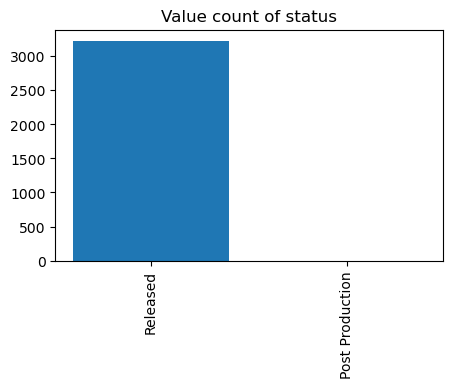

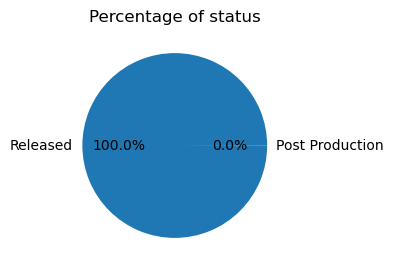

In [70]:
main_cat('status')

**All the movies in the dataset are released.**

Unique values in release_month :12
Missing values count for release_month : 0
Mode of release_month : 12



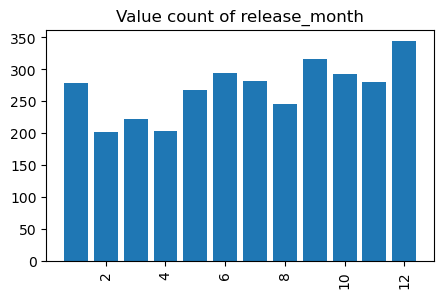

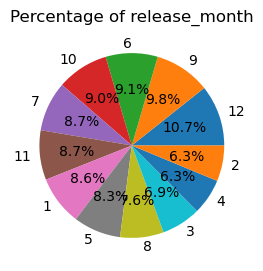

In [71]:
main_cat('release_month')

**Most of films are released in 12th month, followed by last 9th & 6 th month.**

Unique values in genre_type :19
Missing values count for genre_type : 0
Mode of genre_type : Drama



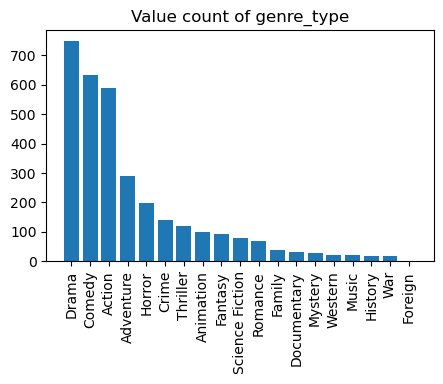

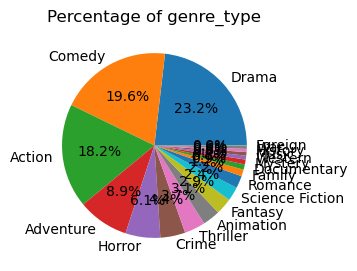

In [72]:
main_cat('genre_type')

**Most of films are 'Drama' type.**

In [73]:
a = cp_tmdf['production_company'].value_counts()
a1 = a.head(10)
count1 = a1.values
index1 = a1.index

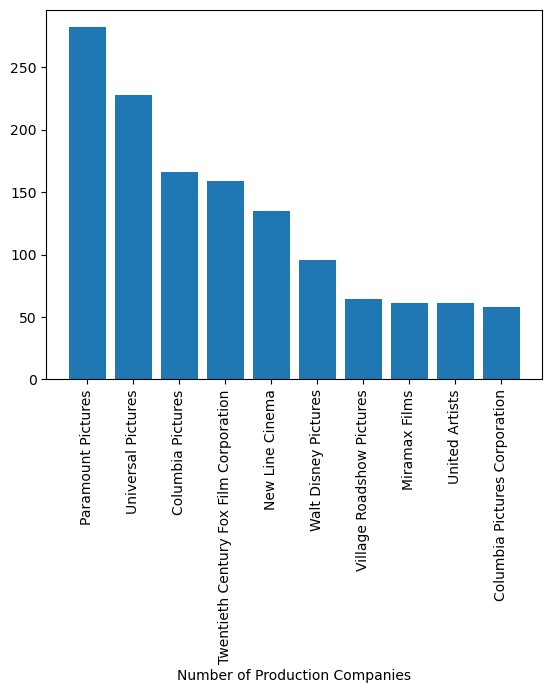

In [74]:
plt.bar(index1,count1)
plt.xlabel('Number of Production Companies')
plt.xticks(rotation=90)
plt.show()

**Paramount Pictures are the top production company.**

In [75]:
#created thsi num_info() to get the skewness nd kurtosis values
def num_info(col):
    print(col)
    print(f'skewness {cp_tmdf[col].skew()}')
    print(f'kurtos {cp_tmdf[col].kurt()}')
    
#created thsi num_visual() to plot the hist and the boxplot
def num_visual(col):
    fig,ax=plt.subplots(2,1,figsize=(6,7))
    ax[0].hist(cp_tmdf[col])
    ax[0].set_xlabel(col)
    ax[0].set_ylabel('count')
    sns.boxplot(y=cp_tmdf[col],ax=ax[1])
    ax[1].set_xlabel(col)
    ax[1].set_ylabel('count')
    
#combine both functions under num_vis()
def num_vis(col):
    num_info(col)
    num_visual(col)

budget
skewness 2.089625759097414
kurtos 5.527139284230367


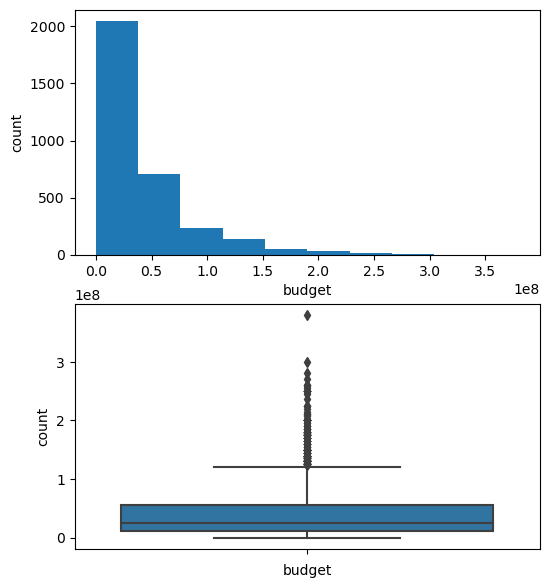

In [76]:
num_vis('budget')

**Budget has many Outliers**

popularity
skewness 9.265740454572889
kurtos 162.82947992017912


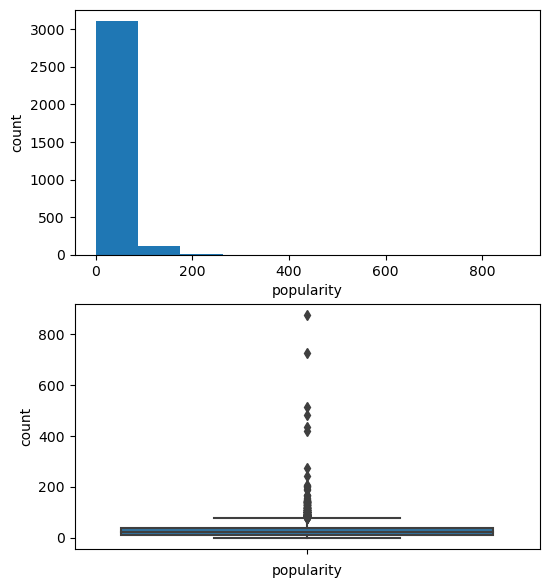

In [77]:
num_vis('popularity')

**Most of the actors popularity was below 200**

revenue
skewness 3.8200912943666436
kurtos 24.911496276789787


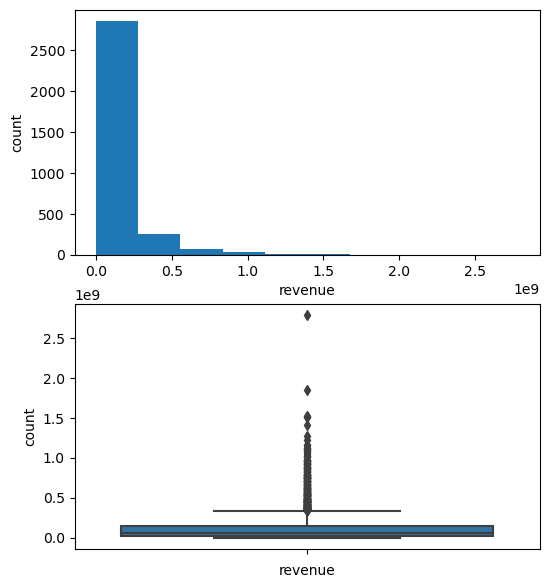

In [78]:
num_vis('revenue')

**Budget, Popluarity, & 
Revenue has many Outliers**

In [79]:
#here, cp_tmdf is the dataset,
#runtime is feature,
#mean is arithmetic average
cp_tmdf['runtime'].mean()

108.57014555589966

runtime
skewness 0.5737455067652768
kurtos -0.044280139590875844


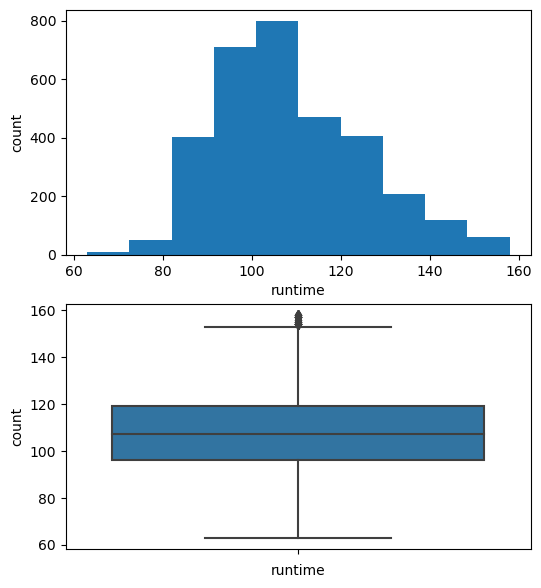

In [80]:
num_vis('runtime')

**The Highest Runtime is 350 mins**

vote_average
skewness -0.6081709039350435
kurtos 1.9505342793254372


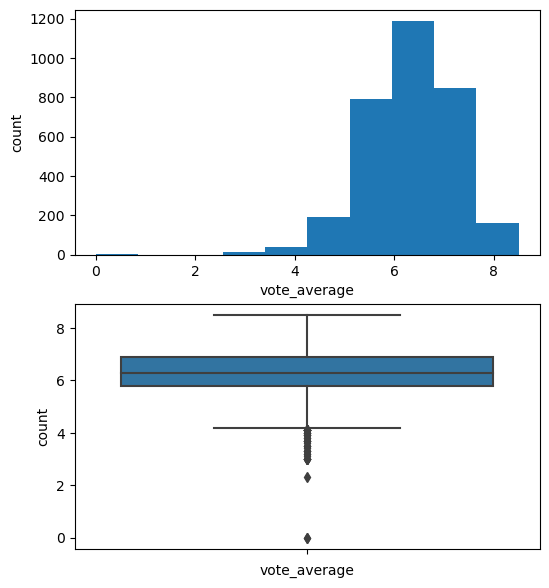

In [81]:
num_vis('vote_average')

**The Vote_Average has most outliers below 4**

vote_count
skewness 3.2075841774419236
kurtos 13.926923349241514


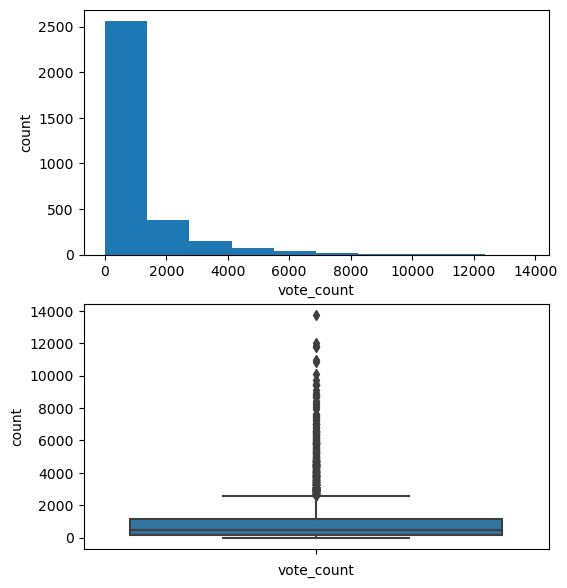

In [82]:
num_vis('vote_count')

**The Highest Vote Count is 14000**

release_year
skewness -2.225509108051145
kurtos 6.580800797457087


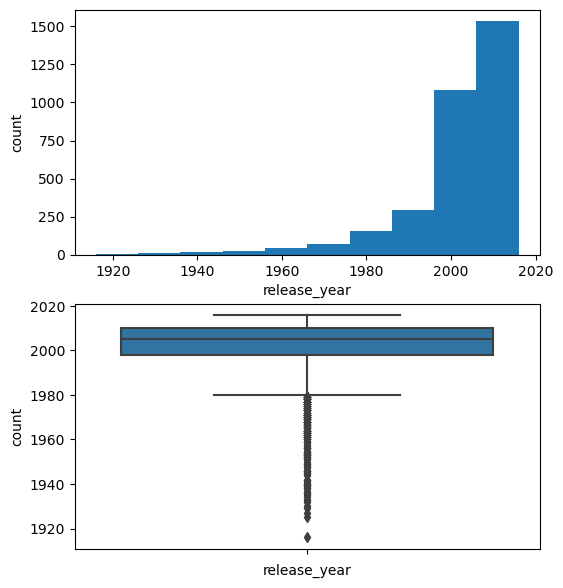

In [83]:
num_vis('release_year')

**Many films are released in last 20 years**

profit
skewness 4.231071186111629
kurtos 32.06110315490727


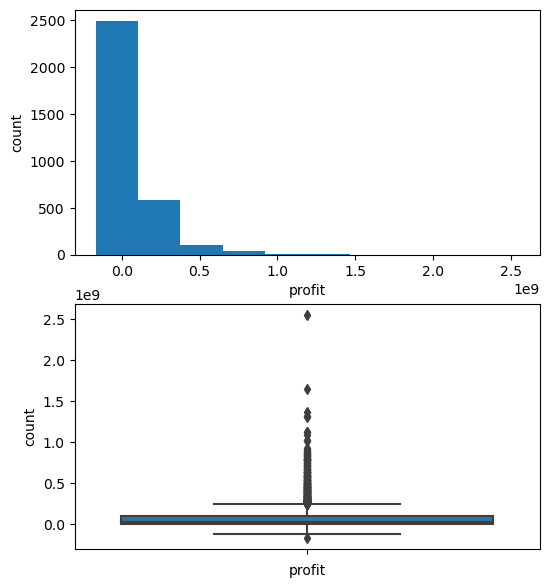

In [84]:
num_vis('profit')

**Most film profits are budget, revenue nd the popularity**

BI-VARIATE ANALYSIS:

**1) Is there a relationship between a movie's budget and its revenue? Does a higher budget result in higher revenue?**

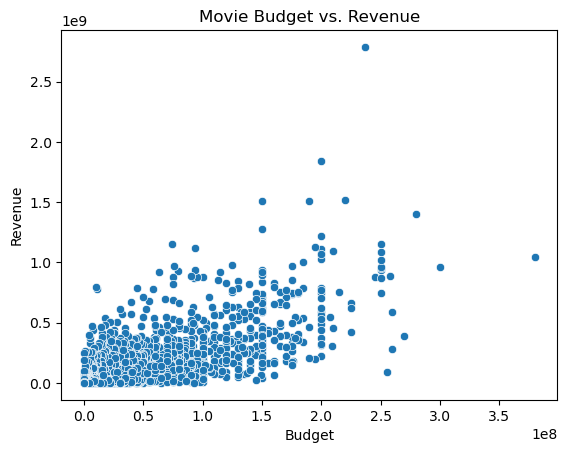

In [85]:
sns.scatterplot(cp_tmdf['budget'], cp_tmdf['revenue'])
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Movie Budget vs. Revenue')
plt.show()

**When the Budget 1.5 le8 also most films didn't generate revenue 1.0**

**2) Do movie ratings vary based on the combination of genres? Are there genre combinations that tend to receive higher average voting scores?**

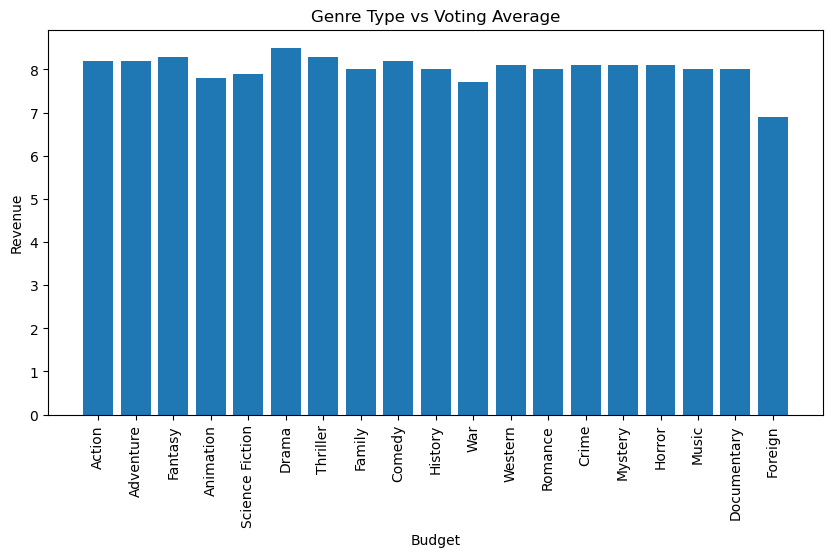

In [86]:
plt.figure(figsize=(10,5))
plt.bar(x= 'genre_type', height='vote_average', data= cp_tmdf)
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.title('Genre Type vs Voting Average')
plt.show()

**Most Revenue is generated in the Drama Genre**

**3) Is there a correlation between a movie's release date (e.g., month or season) and its popularity? Do movies released during specific periods tend to be more popular?**

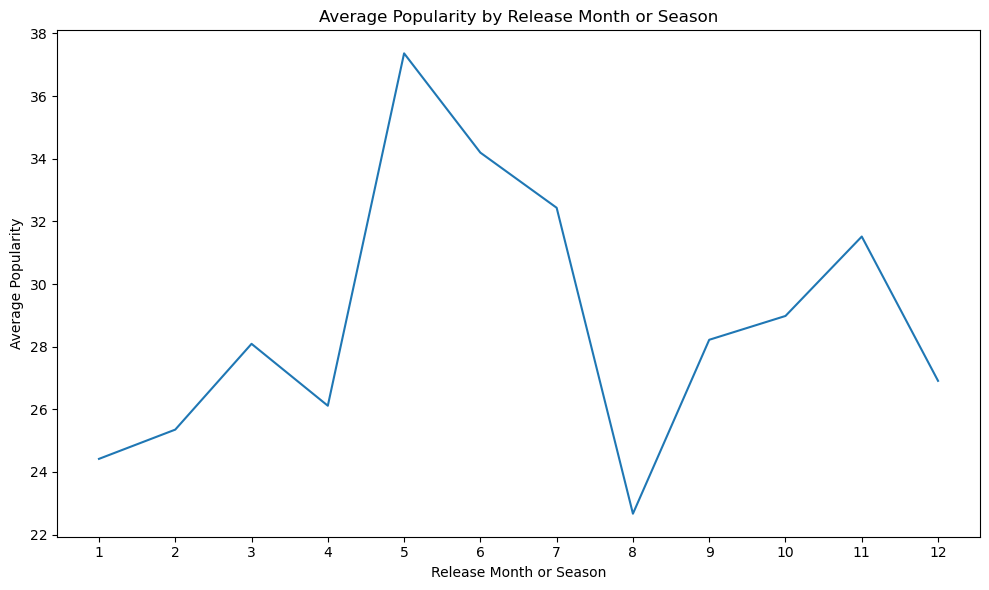

In [87]:
# Grouping the data by release month or season and calculating the average popularity
grouped_data = cp_tmdf.groupby('release_month')['popularity'].mean()
plt.figure(figsize=(10, 6))
plt.plot(grouped_data.index, grouped_data.values)
plt.xlabel('Release Month or Season')
plt.ylabel('Average Popularity')
plt.title('Average Popularity by Release Month or Season')
plt.xticks(grouped_data.index) 
plt.tight_layout()
plt.show()

**Movies released in the month of May tend to have more popularity**

**4) Do certain genres tend to have longer or shorter runtimes? Is there a relationship between genre and movie duration?**

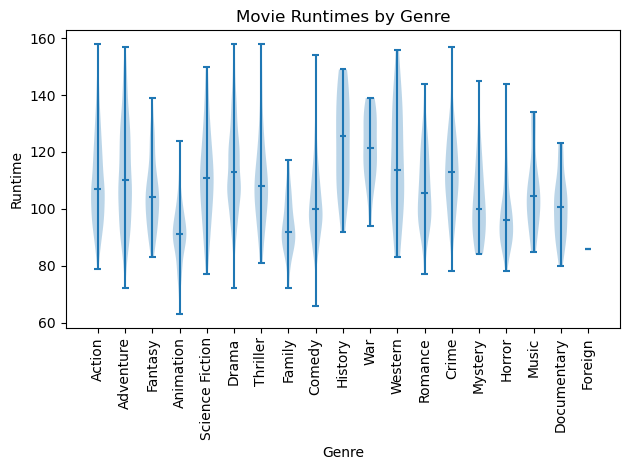

In [88]:
#
plt.violinplot([cp_tmdf.loc[cp_tmdf['genre_type'] == genre, 'runtime'] for genre in cp_tmdf['genre_type'].unique()], 
               showmedians=True)
plt.xticks(range(1, len(cp_tmdf['genre_type'].unique()) + 1), cp_tmdf['genre_type'].unique(), rotation=90)
plt.xlabel('Genre')
plt.ylabel('Runtime')
plt.title('Movie Runtimes by Genre')
plt.tight_layout()
plt.show()

**"Animation, Documentary" genre will have shorter duration whereas 'History' tend to have longer runtime.**

**5) Which production companies tend to generate higher revenue?**

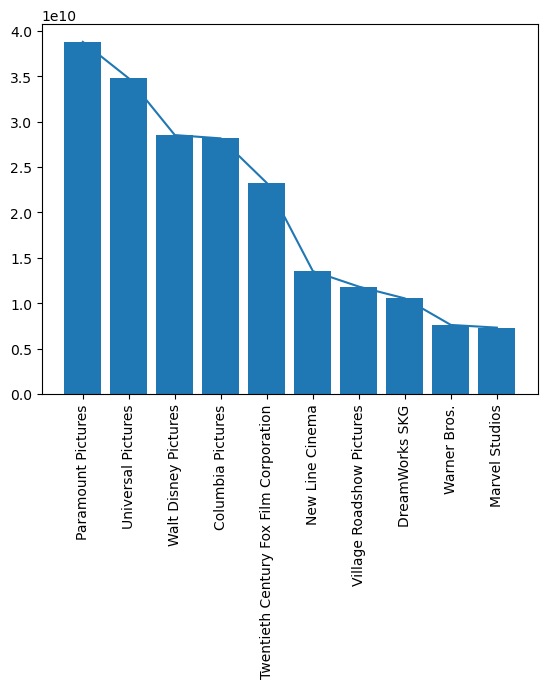

In [89]:
top_10 = cp_tmdf.groupby(cp_tmdf['production_company'])['revenue'].sum().nlargest(10)
plt.plot(top_10)
plt.bar(top_10.index,top_10.values)
plt.xticks(rotation=90)
plt.show()

**Paramount Pictures tend to generate high Revenue**

**6) Do movie ratings vary based on the combination of genres? Are there genre combinations that tend to receive higher average voting scores?**

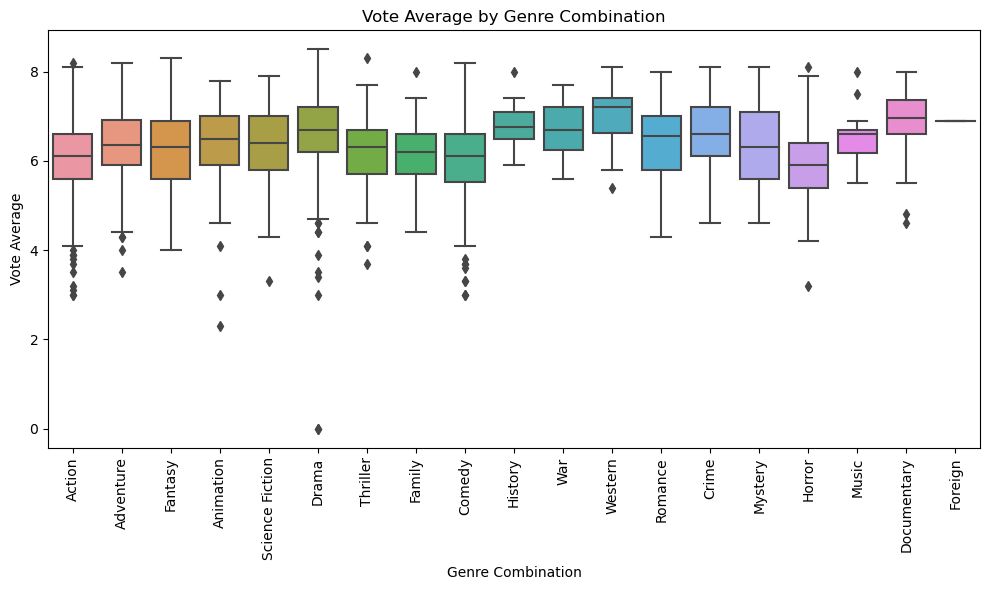

In [90]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=cp_tmdf, x='genre_type', y='vote_average')
plt.xlabel('Genre Combination')
plt.ylabel('Vote Average')
plt.title('Vote Average by Genre Combination')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**'History' & 'War' genre films ratings  are high**

**7) How does the relationship between a movie's budget and revenue vary across different genres? Are there specific genres where the budget-revenue relationship is stronger?**

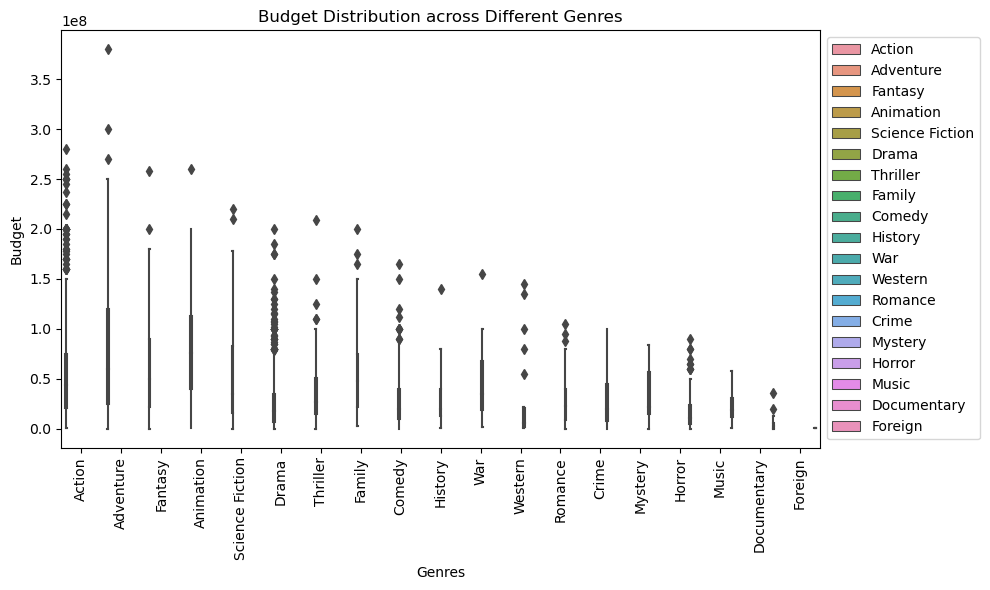

In [91]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=cp_tmdf, x='genre_type', y='budget', hue='genre_type')
plt.xlabel('Genres')
plt.ylabel('Budget')
plt.title('Budget Distribution across Different Genres')
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='popularity', ylabel='profit'>

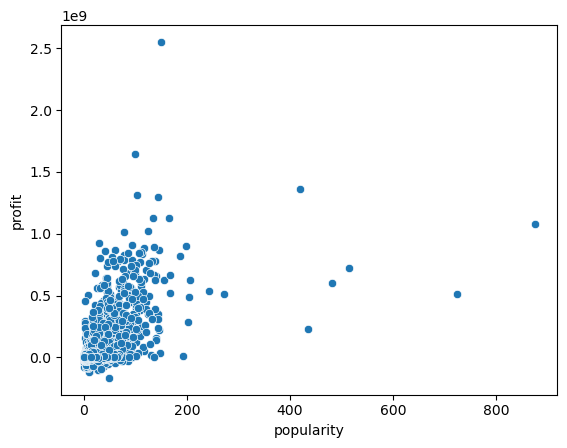

In [196]:
sns.scatterplot(x='popularity',y='profit',data=cp_tmdf)

**There is no much relationship between the popularity and the Profit**

**Multi Variate**

**1)How does the release year of a movie relate to its popularity and vote average?**

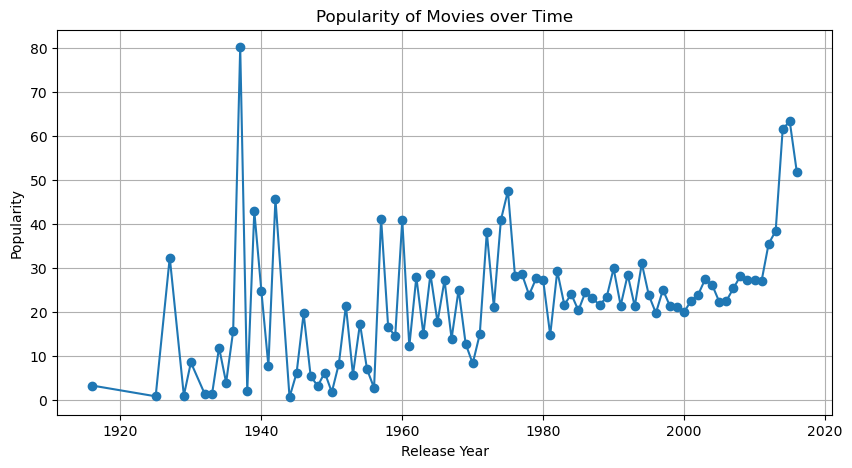

In [92]:
yearly_data = cp_tmdf.groupby('release_year').agg({'popularity': 'mean', 'vote_average': "mean"}).reset_index()

# Sorting the data by release year in ascending order
yearly_data = yearly_data.sort_values('release_year')

# Plotting the popularity over time
plt.figure(figsize=(10, 5))
plt.plot(yearly_data['release_year'], yearly_data['popularity'], marker='o')
plt.xlabel('Release Year')
plt.ylabel('Popularity')
plt.title('Popularity of Movies over Time')
plt.grid(True)
plt.show()

**In the Year 1960 the Popularity of Moives is High.**

**2) Which kind of Genre topped from 2014 where language is 'English'**

In [93]:
#conditional dataset
t2 = (cp_tmdf['vote_average'] >=7) & (cp_tmdf['release_year']>=2014) & (cp_tmdf['original_language'] == 'en')
t2 = cp_tmdf[t2]
t2.head(2)

,budget,original_language,popularity,revenue,runtime,status,title,vote_average,vote_count,release_year,release_month,genre_type,production_country,lead_name,production_company,lead_chrctr_name,directors,profit
7,280000000,en,134.279229,1405403694,141.0,Released,Avengers: Age of Ultron,7.3,6767,2015,4,Action,United States of America,Robert Downey Jr.,Marvel Studios,Tony Stark / Iron Man,Joss Whedon,1125403694
19,250000000,en,120.965743,956019788,144.0,Released,The Hobbit: The Battle of the Five Armies,7.1,4760,2014,10,Action,New Zealand,Martin Freeman,WingNut Films,Bilbo Baggins,Peter Jackson,706019788


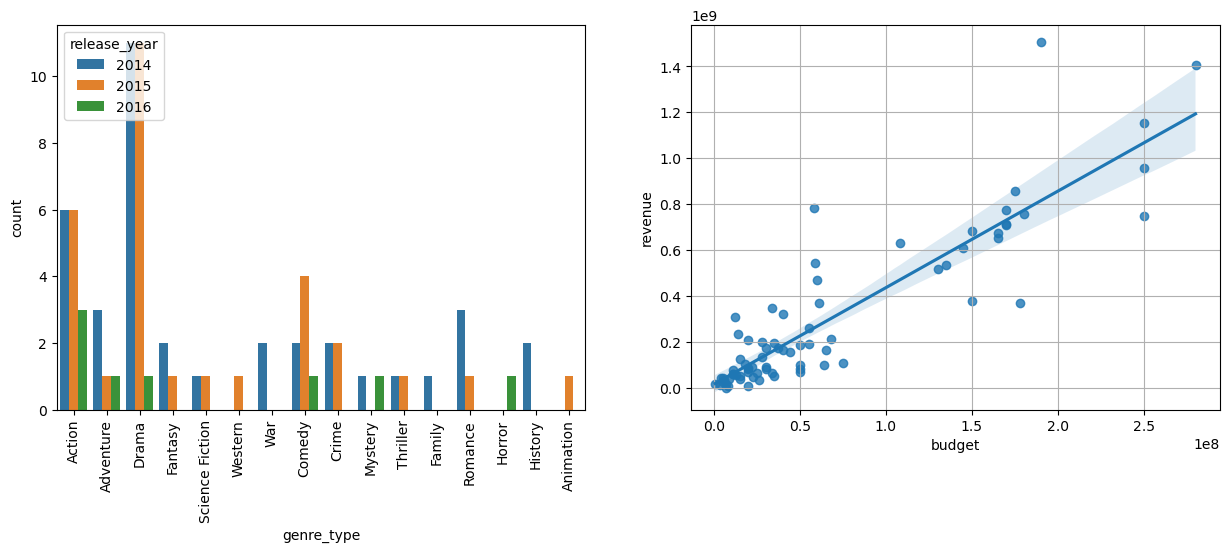

In [94]:
#plotting the plots
fig, ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='genre_type',hue='release_year',data=t2,ax=ax[0])
# sns.scatterplot(x='budget',y='revenue',data=t2,ax=ax[1])
sns.regplot(data = t2,x = 'budget', y = 'revenue',ax=ax[1])
ax[0].set_xticklabels(t2['genre_type'].unique(), rotation=90)
plt.grid()
plt.show()

**Most films are from 'Drama' genre in the year 2014 & 2015**

**3)**

In [95]:
#conditional dataset
t3 = (cp_tmdf['popularity'] >=150 ) & (cp_tmdf['release_year'] >= 2008) & (cp_tmdf['vote_average'] >=6)
t3 = cp_tmdf[t3]
t3.head(2)

,budget,original_language,popularity,revenue,runtime,status,title,vote_average,vote_count,release_year,release_month,genre_type,production_country,lead_name,production_company,lead_chrctr_name,directors,profit
0,237000000,en,150.437577,2787965087,107.0,Released,Avatar,7.2,11800,2009,10,Action,United States of America,Sam Worthington,Ingenious Film Partners,Jake Sully,James Cameron,2550965087
26,250000000,en,198.372395,1153304495,147.0,Released,Captain America: Civil War,7.1,7241,2016,4,Adventure,United States of America,Chris Evans,Studio Babelsberg,Steve Rogers / Captain America,Anthony Russo,903304495


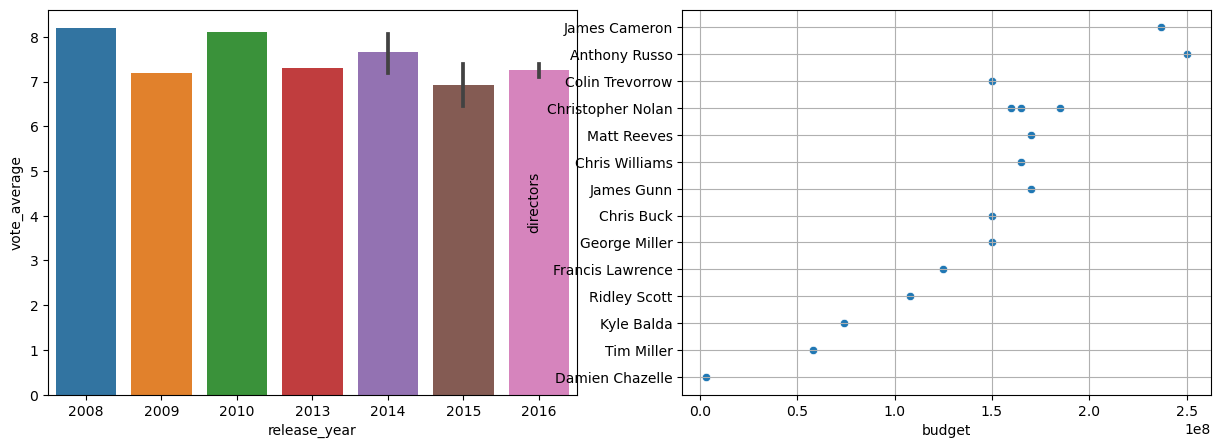

In [96]:
#plotting the plots
fig, ax=plt.subplots(1,2,figsize=(15,5))
sns.barplot(x='release_year',y='vote_average',data=t3,ax=ax[0])
sns.scatterplot(x='budget',y='directors',data=t3,ax=ax[1])
plt.grid()
plt.show()

**We can clearly notice that 'Christopher Nolan' directed films in the range between 1.5 - 2.0**

In [97]:
cp_tmdf

,budget,original_language,popularity,revenue,runtime,status,title,vote_average,vote_count,release_year,release_month,genre_type,production_country,lead_name,production_company,lead_chrctr_name,directors,profit
0,237000000,en,150.437577,2787965087,107.0,Released,Avatar,7.2,11800,2009,10,Action,United States of America,Sam Worthington,Ingenious Film Partners,Jake Sully,James Cameron,2550965087
1,300000000,en,139.082615,961000000,107.0,Released,Pirates of the Caribbean: At World's End,6.9,4500,2007,5,Adventure,United States of America,Johnny Depp,Walt Disney Pictures,Captain Jack Sparrow,Gore Verbinski,661000000
2,245000000,en,107.376788,880674609,148.0,Released,Spectre,6.3,4466,2015,10,Action,United Kingdom,Daniel Craig,Columbia Pictures,James Bond,Sam Mendes,635674609
3,250000000,en,112.312950,1084939099,107.0,Released,The Dark Knight Rises,7.6,9106,2012,7,Action,United States of America,Christian Bale,Legendary Pictures,Bruce Wayne / Batman,Christopher Nolan,834939099
4,260000000,en,43.926995,284139100,132.0,Released,John Carter,6.1,2124,2012,7,Action,United States of America,Taylor Kitsch,Walt Disney Pictures,John Carter,Andrew Stanton,24139100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4772,27000,en,19.748658,3151130,92.0,Released,Clerks,7.4,755,1994,9,Comedy,United States of America,Brian O'Halloran,Miramax Films,Dante Hicks,Kevin Smith,3124130
4787,12000,en,4.553644,6000000,93.0,Released,Pink Flamingos,6.2,110,1972,12,Horror,United States of America,Divine,Dreamland Productions,Divine / Babs Johnson,John Waters,5988000
4791,20000,ja,0.212443,99000,111.0,Released,Cure,7.4,63,1997,6,Crime,Japan,Koji Yakusho,Daiei Studios,Kenichi Takabe,Kiyoshi Kurosawa,79000
4795,7000,en,23.307949,424760,77.0,Released,Primer,6.9,658,2004,8,Science Fiction,United States of America,Shane Carruth,Thinkfilm,Aaron,Shane Carruth,417760


### Feature Engineering:

In [98]:
#the process of using domain knowledge to select and transform the most,
#relevant variables from raw data when creating a predictive model using machine learning or statistical modeling.

In [99]:
#Average of vote_average
m = cp_tmdf['vote_average'].mean()

In [100]:
m

6.309352740786616

In [101]:
# bin1 = cp_tmdf['vote_average'] > m
# bin2 = (cp_tmdf['vote_average'] >= (m/2)) & (cp_tmdf['vote_average'] <= m)
# bin3 = (cp_tmdf['vote_average'] < (m/2))

In [102]:
# bins = [bin3, bin1, bin1]
# labels = ['Good', 'Average', 'Poor']

In [103]:
# cp_tmdf['rating'] = pd.cut(cp_tmdf['vote_average'], bins=bins, labels=labels)

In [104]:
#using for loop created the cluster format of ratings based on good, average nd poor
rating = []
for i in cp_tmdf['vote_average']:
    if (i > m) :
        rating.append('Good')
    elif ((i >= (m/2)) & (i <= m)) :
        rating.append('Average')
    elif (i < (m/2)):
        rating.append('Poor')
cp_tmdf['rating'] = rating

In [105]:
cp_tmdf

,budget,original_language,popularity,revenue,runtime,status,title,vote_average,vote_count,release_year,release_month,genre_type,production_country,lead_name,production_company,lead_chrctr_name,directors,profit,rating
0,237000000,en,150.437577,2787965087,107.0,Released,Avatar,7.2,11800,2009,10,Action,United States of America,Sam Worthington,Ingenious Film Partners,Jake Sully,James Cameron,2550965087,Good
1,300000000,en,139.082615,961000000,107.0,Released,Pirates of the Caribbean: At World's End,6.9,4500,2007,5,Adventure,United States of America,Johnny Depp,Walt Disney Pictures,Captain Jack Sparrow,Gore Verbinski,661000000,Good
2,245000000,en,107.376788,880674609,148.0,Released,Spectre,6.3,4466,2015,10,Action,United Kingdom,Daniel Craig,Columbia Pictures,James Bond,Sam Mendes,635674609,Average
3,250000000,en,112.312950,1084939099,107.0,Released,The Dark Knight Rises,7.6,9106,2012,7,Action,United States of America,Christian Bale,Legendary Pictures,Bruce Wayne / Batman,Christopher Nolan,834939099,Good
4,260000000,en,43.926995,284139100,132.0,Released,John Carter,6.1,2124,2012,7,Action,United States of America,Taylor Kitsch,Walt Disney Pictures,John Carter,Andrew Stanton,24139100,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4772,27000,en,19.748658,3151130,92.0,Released,Clerks,7.4,755,1994,9,Comedy,United States of America,Brian O'Halloran,Miramax Films,Dante Hicks,Kevin Smith,3124130,Good
4787,12000,en,4.553644,6000000,93.0,Released,Pink Flamingos,6.2,110,1972,12,Horror,United States of America,Divine,Dreamland Productions,Divine / Babs Johnson,John Waters,5988000,Average
4791,20000,ja,0.212443,99000,111.0,Released,Cure,7.4,63,1997,6,Crime,Japan,Koji Yakusho,Daiei Studios,Kenichi Takabe,Kiyoshi Kurosawa,79000,Good
4795,7000,en,23.307949,424760,77.0,Released,Primer,6.9,658,2004,8,Science Fiction,United States of America,Shane Carruth,Thinkfilm,Aaron,Shane Carruth,417760,Good


In [106]:
#divided the object and int features
from tabulate import tabulate
def dtype(df):
    cat_var = []
    con_var = []
    for col in df:
        if(df[col].dtype == 'object'):
            cat_var.append(col)
        else:
            con_var.append(col)
    return cat_var, con_var
cat_var, con_var = dtype(cp_tmdf)
print(tabulate({'Categorical':cat_var,'Numerical':con_var},headers=['Categorical','Numerical']))

Categorical         Numerical
------------------  -------------
original_language   budget
status              popularity
title               revenue
genre_type          runtime
production_country  vote_average
lead_name           vote_count
production_company  release_year
lead_chrctr_name    release_month
directors           profit
rating


In [107]:
#object features, which need to be converted into categorical
cat_var

['original_language',
 'status',
 'title',
 'genre_type',
 'production_country',
 'lead_name',
 'production_company',
 'lead_chrctr_name',
 'directors',
 'rating']

In [108]:
#Object to Categorical
for i in cat_var:
    cp_tmdf[i]= cp_tmdf[i].astype("category")
cp_tmdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3229 entries, 0 to 4797
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   budget              3229 non-null   int64   
 1   original_language   3229 non-null   category
 2   popularity          3229 non-null   float64 
 3   revenue             3229 non-null   int64   
 4   runtime             3229 non-null   float64 
 5   status              3229 non-null   category
 6   title               3229 non-null   category
 7   vote_average        3229 non-null   float64 
 8   vote_count          3229 non-null   int64   
 9   release_year        3229 non-null   int64   
 10  release_month       3229 non-null   int64   
 11  genre_type          3229 non-null   category
 12  production_country  3229 non-null   category
 13  lead_name           3229 non-null   category
 14  production_company  3229 non-null   category
 15  lead_chrctr_name    3229 non-null   ca

In [109]:
#label encoding: converting categorical into numerical
for i in cat_var:
    cp_tmdf[i] = LabelEncoder().fit_transform(cp_tmdf[i])
cp_tmdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3229 entries, 0 to 4797
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   budget              3229 non-null   int64  
 1   original_language   3229 non-null   int32  
 2   popularity          3229 non-null   float64
 3   revenue             3229 non-null   int64  
 4   runtime             3229 non-null   float64
 5   status              3229 non-null   int32  
 6   title               3229 non-null   int32  
 7   vote_average        3229 non-null   float64
 8   vote_count          3229 non-null   int64  
 9   release_year        3229 non-null   int64  
 10  release_month       3229 non-null   int64  
 11  genre_type          3229 non-null   int32  
 12  production_country  3229 non-null   int32  
 13  lead_name           3229 non-null   int32  
 14  production_company  3229 non-null   int32  
 15  lead_chrctr_name    3229 non-null   int32  
 16  direct

Feature Scaling:

In [110]:
num_cat = ['int32', 'float64', 'int64']
num_df  = cp_tmdf.select_dtypes(include=num_cat)
scaler = StandardScaler()
scale_df = pd.DataFrame(scaler.fit_transform(num_df), columns=num_df.columns)
scale_df

,budget,original_language,popularity,revenue,runtime,status,title,vote_average,vote_count,release_year,release_month,genre_type,production_country,lead_name,production_company,lead_chrctr_name,directors,profit,rating
0,4.423207,-0.138579,3.357396,14.316125,-0.095450,0.017601,-1.457099,1.019332,7.653479,0.551280,0.899597,-1.091918,0.502799,1.173746,-0.506811,-0.207586,-0.468694,15.623087,0.981434
1,5.842450,-0.138579,3.043378,4.508181,-0.095450,0.017601,0.155830,0.675987,2.491151,0.400649,-0.538565,-0.875637,0.502799,-0.061190,1.231539,-1.242190,-0.644843,3.670622,0.981434
2,4.603428,-0.138579,2.166560,4.076960,2.396952,0.017601,0.550745,-0.010704,2.467107,1.003173,0.899597,-1.091918,0.425938,-1.015458,-1.366884,-0.192945,1.088085,3.510460,-0.994283
3,4.716066,-0.138579,2.303069,5.173540,-0.095450,0.017601,0.867321,1.477126,5.748368,0.777227,0.036700,-1.091918,0.502799,-1.143763,-0.279278,-1.306853,-1.249464,4.770643,0.981434
4,4.941343,-0.138579,0.411871,0.874497,1.424307,0.017601,-0.378594,-0.239601,0.810919,0.777227,0.036700,-1.091918,0.502799,1.435702,1.231539,-0.020918,-1.620806,-0.356996,-0.994283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3224,-0.915241,-0.138579,-0.256775,-0.633968,-1.007304,0.017601,-1.163059,1.248229,-0.157195,-0.578453,0.611965,-0.443077,0.502799,-1.346912,0.007413,-0.966458,0.071656,-0.489898,0.981434
3225,-0.915579,-0.138579,-0.676990,-0.618674,-0.946513,0.017601,0.151537,-0.125153,-0.613318,-2.235396,1.474862,1.287166,0.502799,-0.903191,-1.130250,-0.865194,-0.152101,-0.471787,-0.994283
3226,-0.915399,4.229373,-0.797045,-0.650354,0.147712,0.017601,-1.091158,1.248229,-0.646555,-0.352507,-0.250932,-0.226796,-0.880701,0.214131,-1.266770,0.152329,0.097840,-0.509156,0.981434
3227,-0.915692,-0.138579,-0.158344,-0.648605,-1.919158,0.017601,0.198755,0.675987,-0.225790,0.174702,0.324333,2.152288,0.502799,1.272647,0.976702,-1.727771,1.159497,-0.507014,0.981434


In [111]:
corel_matrix = scale_df.corr()
corel_matrix.head(5)

,budget,original_language,popularity,revenue,runtime,status,title,vote_average,vote_count,release_year,release_month,genre_type,production_country,lead_name,production_company,lead_chrctr_name,directors,profit,rating
budget,1.000000,-0.063826,0.431990,0.705399,0.245441,0.015327,0.040346,-0.031208,0.540165,0.267182,0.011782,-0.182290,-0.011381,0.000414,0.059371,-0.007968,-0.011994,0.550252,-0.060786
original_language,-0.063826,1.000000,-0.048544,-0.055024,0.043678,0.002439,-0.007641,0.055008,-0.057204,0.040681,-0.009743,-0.014493,-0.164410,0.006501,-0.045335,0.004792,0.029053,-0.046902,0.060877
popularity,0.431990,-0.048544,1.000000,0.602246,0.165290,0.013305,-0.001430,0.286994,0.749088,0.161351,0.012477,-0.028818,0.006039,0.002288,0.057009,0.016480,-0.031645,0.588190,0.197407
revenue,0.705399,-0.055024,0.602246,1.000000,0.216339,0.011377,0.028513,0.187839,0.756210,0.147443,0.019498,-0.120813,0.048028,0.029820,0.067477,0.004281,-0.020906,0.980003,0.127834
runtime,0.245441,0.043678,0.165290,0.216339,1.000000,-0.000460,0.048723,0.344702,0.246399,-0.065731,0.079141,0.011126,-0.031451,0.015563,-0.010199,-0.013388,0.017584,0.185951,0.272104


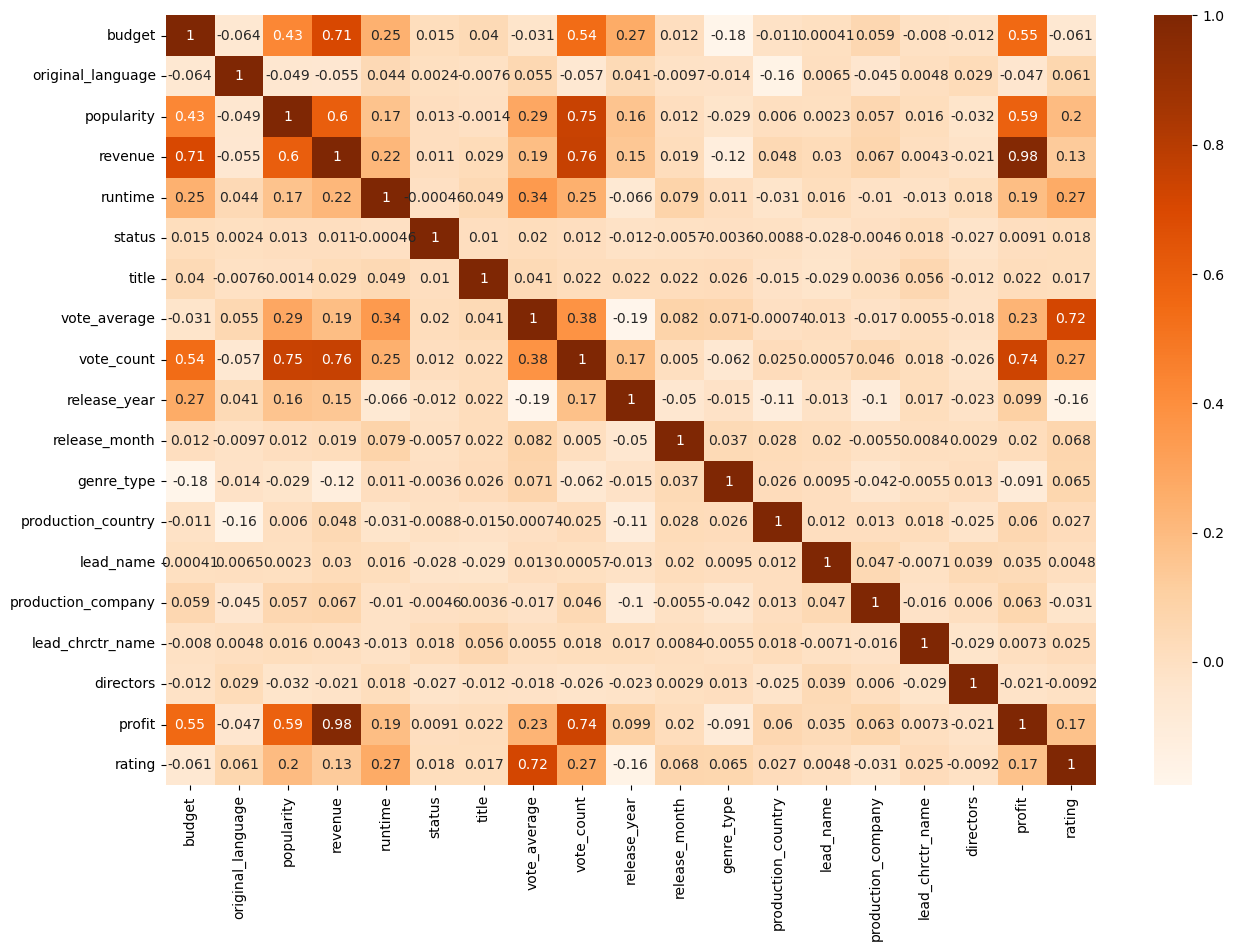

In [112]:
plt.figure(figsize=(15,10))
sns.heatmap(corel_matrix, annot = True, cmap = 'Oranges')
plt.show()

In [113]:
def correlation(df,threshold):
    col_corr=set()
    corel_matrix=df.corr()
    for i in range(len(corel_matrix.columns)):
        for j in range(i):
            if(abs(corel_matrix.iloc[i,j]))>threshold:
                col_name=corel_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [114]:
sel_features=correlation(scale_df,0.4)
len(set(sel_features))

5

In [115]:
sel_features

{'popularity', 'profit', 'rating', 'revenue', 'vote_count'}

**Most Features are having Imbalance Data, to Balance the data performed over Sampling - SMOTE process**

In [116]:
from imblearn.over_sampling import SMOTE

In [117]:
cp_tmdf.rating.value_counts()

0    1614
1    1605
2      10
Name: rating, dtype: int64

In [118]:
y = cp_tmdf['rating']
x = cp_tmdf.drop(['rating','vote_average'], axis =1)
print(x.shape)
print(y.shape)

(3229, 17)
(3229,)


In [119]:
os  = SMOTE()
x1, y1 = os.fit_resample(x,y)

In [120]:
#Hold one out process
#Splitting the data in train and test
X1_train, X1_test, y1_train, y1_test = train_test_split(x1,y1, test_size=0.3, random_state=42)
print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)

(3389, 17)
(3389,)
(1453, 17)


In [121]:
y.value_counts()

0    1614
1    1605
2      10
Name: rating, dtype: int64

In [122]:
train_accrcy_score = []
test_accrcy_score = []
test_f1_score = []
recall = []
precision = []

### Logistic Regression

In [123]:
lr_bal_model=LogisticRegression().fit(X1_train,y1_train)

In [124]:
y_pred_lrbal=lr_bal_model.predict(X1_test)
y_pred_lrbal

array([2, 2, 1, ..., 0, 0, 2])

In [125]:
log_prob_bal = lr_bal_model.predict_proba(X1_test)
log_prob_bal = log_prob_bal[:,1]
r_prob_bal = [0 for _ in range(len(y1_test))]

In [126]:
train_accrcy_score = []
test_accrcy_score = []
test_f1_score = []
auc_roc = []
recall = []
precision = []

In [127]:
lr_bal_actrain = lr_bal_model.score(X1_train, y1_train)
lr_bal_actest = lr_bal_model.score(X1_test, y1_test)

print("train_acc_score", lr_bal_actrain)
train_accrcy_score.append(lr_bal_actrain)

print("test_acc_score", lr_bal_actest)
test_accrcy_score.append(lr_bal_actest)

train_acc_score 0.6730598996754205
test_acc_score 0.6930488644184446


In [128]:
lr_precision = precision_score(y1_test,y_pred_lrbal,average='macro')
precision.append(lr_precision)
print("Model precision_score :",lr_precision)

Model precision_score : 0.6911320344901254


In [129]:
f1_test_lrbal = f1_score(y1_test, y_pred_lrbal,average='macro')
test_f1_score.append(f1_test_lrbal)

print("f1_test_score", f1_test_lrbal)

f1_test_score 0.6859986085771022


In [130]:
lr_recall=recall_score(y1_test,y_pred_lrbal,average='macro')
recall.append(lr_recall)
print("Model recall_score :",lr_recall)

Model recall_score : 0.6971940446698398


In [131]:
print(confusion_matrix(y1_test,y_pred_lrbal))

[[298 106  75]
 [197 258  47]
 [ 21   0 451]]


In [132]:
print(classification_report(y1_test,y_pred_lrbal))


              precision    recall  f1-score   support

           0       0.58      0.62      0.60       479
           1       0.71      0.51      0.60       502
           2       0.79      0.96      0.86       472

    accuracy                           0.69      1453
   macro avg       0.69      0.70      0.69      1453
weighted avg       0.69      0.69      0.68      1453



### Naive Bayes

In [133]:
gn_bal_model=GaussianNB().fit(X1_train,y1_train)
y_pred_gnbal=gn_bal_model.predict(X1_test)

In [134]:
gn_bal_actrain = gn_bal_model.score(X1_train, y1_train)
gn_bal_actest = gn_bal_model.score(X1_test, y1_test)

print("br_train_acc_score", gn_bal_actrain)
train_accrcy_score.append(gn_bal_actrain)
print("br_test_acc_score", gn_bal_actest)
test_accrcy_score.append(gn_bal_actest)

br_train_acc_score 0.5830628503983476
br_test_acc_score 0.596696490020647


In [135]:
f1_test_gnbal = f1_score(y1_test, y_pred_gnbal, average='macro')
test_f1_score.append(f1_test_gnbal)

print("f1_test_score", f1_test_gnbal)

f1_test_score 0.5550546500235396


In [136]:
gn_precision = precision_score(y1_test,y_pred_gnbal,average='macro')
precision.append(gn_precision)
print("Model precision_score :",gn_precision)

Model precision_score : 0.6322636702214852


In [137]:
gn_recall=recall_score(y1_test,y_pred_gnbal, average='macro')
recall.append(gn_recall)
print("Model recall_score :",gn_recall)

Model recall_score : 0.6046358014153123


In [138]:
print(confusion_matrix(y1_test,y_pred_gnbal))

[[308  36 135]
 [266 106 130]
 [ 19   0 453]]


In [139]:
print(classification_report(y1_test,y_pred_gnbal))

              precision    recall  f1-score   support

           0       0.52      0.64      0.57       479
           1       0.75      0.21      0.33       502
           2       0.63      0.96      0.76       472

    accuracy                           0.60      1453
   macro avg       0.63      0.60      0.56      1453
weighted avg       0.63      0.60      0.55      1453



### Decision Tree Classifier

In [140]:
kf=KFold(n_splits=5, shuffle=True, random_state=42)

In [141]:
dt = DecisionTreeClassifier()

In [142]:
param_grid_dtbal={"min_samples_split":np.arange(10,51,10),
            "min_samples_leaf":np.arange(10,101,20),
            "max_depth":np.arange(3,15)
}

In [143]:
grid_cv_dtbal = GridSearchCV(dt,param_grid_dtbal,cv=kf,scoring="precision")


In [144]:
grid_cv_dtbal.fit(X1_train,y1_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_leaf': array([10, 30, 50, 70, 90]),
                         'min_samples_split': array([10, 20, 30, 40, 50])},
             scoring='precision')

In [145]:
grid_cv_dtbal.best_score_

nan

In [146]:
grid_cv_dtbal.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=10)

In [141]:
dt_bal_model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=10)
dt_bal_model.fit(x1,y1)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=10)

In [142]:
dt_bal_actrain = dt_bal_model.score(X1_train, y1_train)
dt_bal_actest = dt_bal_model.score(X1_test, y1_test)

print("dt_train_acc_score", dt_bal_actrain)
train_accrcy_score.append(dt_bal_actrain)
print("dt_test_acc_score", dt_bal_actest)
test_accrcy_score.append(dt_bal_actest)

dt_train_acc_score 0.7373856594865742
dt_test_acc_score 0.7508602890571232


In [143]:
y_pred_dtbal=dt_bal_model.predict(X1_test)

In [144]:
f1_test_dtbal = f1_score(y1_test, y_pred_dtbal,average='macro')
test_f1_score.append(f1_test_dtbal)

print("f1_test_score", f1_test_dtbal)

f1_test_score 0.7458844535192188


In [145]:
dt_precision = precision_score(y1_test,y_pred_dtbal,average='macro')
precision.append(dt_precision)
print("Model precision_score :",dt_precision)

Model precision_score : 0.7430507359957592


In [146]:
dt_recall=recall_score(y1_test,y_pred_dtbal,average='macro')
recall.append(dt_recall)
print("Model recall_score :",dt_recall)

Model recall_score : 0.7532514340688742


In [147]:
print(confusion_matrix(y1_test,y_pred_dtbal))

[[279 158  42]
 [139 340  23]
 [  0   0 472]]


In [148]:
print(classification_report(y1_test,y_pred_dtbal))

              precision    recall  f1-score   support

           0       0.67      0.58      0.62       479
           1       0.68      0.68      0.68       502
           2       0.88      1.00      0.94       472

    accuracy                           0.75      1453
   macro avg       0.74      0.75      0.75      1453
weighted avg       0.74      0.75      0.74      1453



In [155]:
from sklearn import tree

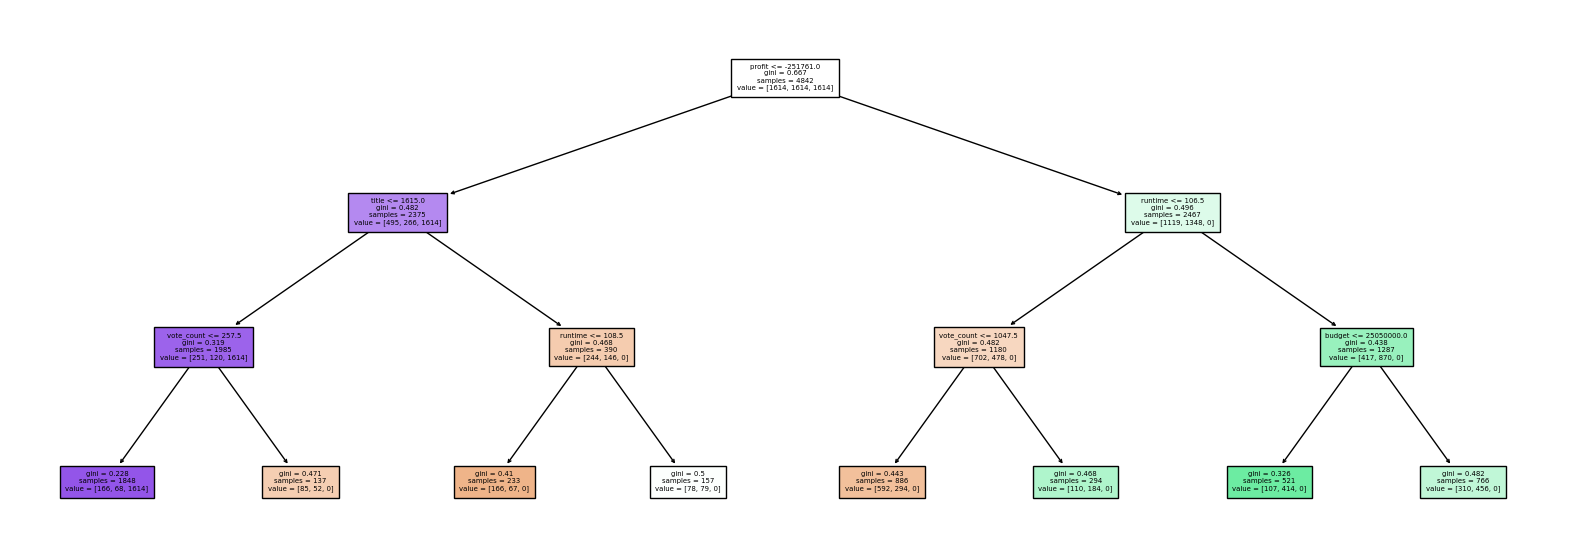

In [156]:
plt.figure(figsize=(20,7))
tree.plot_tree(dt_bal_model,feature_names=x1.columns,filled=True,fontsize=5)
plt.show()

### Random Forest 

In [157]:
param_grid_bal={"n_estimators":np.arange(20,101,20),
            "min_samples_split":np.arange(10,51,10),
            "min_samples_leaf":np.arange(10,101,20),
            "max_depth":np.arange(3,15)}

In [158]:
rf_bal = RandomForestClassifier()

In [159]:
grid_cv_bal=GridSearchCV(rf_bal,param_grid_bal,cv=kf,scoring="precision")

In [160]:
grid_cv_bal.fit(x1,y1)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_leaf': array([10, 30, 50, 70, 90]),
                         'min_samples_split': array([10, 20, 30, 40, 50]),
                         'n_estimators': array([ 20,  40,  60,  80, 100])},
             scoring='precision')

In [161]:
grid_cv_bal.best_score_

nan

In [162]:
grid_cv_bal.best_params_

{'max_depth': 3,
 'min_samples_leaf': 10,
 'min_samples_split': 10,
 'n_estimators': 20}

In [163]:
grid_cv_bal.best_estimator_

RandomForestClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=10,
                       n_estimators=20)

In [149]:
rfbal_model = RandomForestClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=10,
                       n_estimators=20)
rfbal_model.fit(x1,y1)

RandomForestClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=10,
                       n_estimators=20)

In [150]:
rfb_actrain = rfbal_model.score(X1_train, y1_train)
rfb_actest = rfbal_model.score(X1_test, y1_test)

print("rf_train_acc_score", rfb_actrain)
train_accrcy_score.append(rfb_actrain)

print("rf_test_acc_score", rfb_actest)
test_accrcy_score.append(rfb_actest)

rf_train_acc_score 0.7639421658306285
rf_test_acc_score 0.76668960770819


In [151]:
y_predbalrf=rfbal_model.predict(X1_test)

In [152]:
f1bal_test = f1_score(y1_test, y_predbalrf,average='macro')
test_f1_score.append(f1bal_test)

print("f1_test_score", f1bal_test)

f1_test_score 0.7616332356697469


In [153]:
rf_precision = precision_score(y1_test,y_predbalrf,average='macro')
precision.append(rf_precision)
print("Model precision_score :",rf_precision)

Model precision_score : 0.7596562021490345


In [154]:
rf_recall=recall_score(y1_test,y_predbalrf, average='macro')
recall.append(rf_recall)
print("Model recall_score :",rf_recall)

Model recall_score : 0.7690338160233111


In [155]:
print(confusion_matrix(y1_test,y_predbalrf))

[[295 137  47]
 [126 347  29]
 [  0   0 472]]


In [156]:
print(classification_report(y1_test,y_predbalrf))

              precision    recall  f1-score   support

           0       0.70      0.62      0.66       479
           1       0.72      0.69      0.70       502
           2       0.86      1.00      0.93       472

    accuracy                           0.77      1453
   macro avg       0.76      0.77      0.76      1453
weighted avg       0.76      0.77      0.76      1453



### Ada Boost

In [172]:
ada = AdaBoostClassifier()

In [173]:
param_grid_ada_bal={"n_estimators":np.arange(10,101,10),
            "learning_rate":np.arange(0.05,1,0.05)
}

In [174]:
grid_cv2_bal = GridSearchCV(ada,param_grid_ada_bal,cv=kf,scoring="precision")


In [175]:
grid_cv2_bal.fit(X1_train,y1_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])},
             scoring='precision')

In [176]:
grid_cv2_bal.best_params_

{'learning_rate': 0.05, 'n_estimators': 10}

In [177]:
grid_cv2_bal.best_estimator_

AdaBoostClassifier(learning_rate=0.05, n_estimators=10)

In [178]:
grid_cv2_bal.best_score_

nan

In [157]:
bal_ada_model = AdaBoostClassifier(learning_rate=0.05, n_estimators=10)
bal_ada_model.fit(x1,y1)

AdaBoostClassifier(learning_rate=0.05, n_estimators=10)

In [158]:
ad_bal_actrain = bal_ada_model.score(X1_train, y1_train)
ad_bal_actest = bal_ada_model.score(X1_test, y1_test)

print("ad_train_acc_score", ad_bal_actrain)
train_accrcy_score.append(ad_bal_actrain)
print("ad_test_acc_score", ad_bal_actest)
test_accrcy_score.append(ad_bal_actest)

ad_train_acc_score 0.6423723812334022
ad_test_acc_score 0.6304198210598762


In [159]:
y_pred_ad_bal = bal_ada_model.predict(X1_test)

In [160]:
ad_precision = precision_score(y1_test,y_pred_ad_bal,average='macro')
precision.append(ad_precision)
print("Model precision_score :",ad_precision)

Model precision_score : 0.457979797979798


In [161]:
ad_recall=recall_score(y1_test,y_pred_ad_bal,average='macro')
recall.append(ad_recall)
print("Model recall_score :",ad_recall)

Model recall_score : 0.6423103688239388


In [162]:
f1ada_test = f1_score(y1_test, y_pred_ad_bal,average='macro')
test_f1_score.append(f1ada_test)

print("f1_test_score", f1ada_test)

f1_test_score 0.5254928774928774


In [163]:
print(confusion_matrix(y1_test,y_pred_ad_bal))

[[444   0  35]
 [481   0  21]
 [  0   0 472]]


In [164]:
print(classification_report(y1_test,y_pred_ad_bal))

              precision    recall  f1-score   support

           0       0.48      0.93      0.63       479
           1       0.00      0.00      0.00       502
           2       0.89      1.00      0.94       472

    accuracy                           0.63      1453
   macro avg       0.46      0.64      0.53      1453
weighted avg       0.45      0.63      0.52      1453



### KNN

In [166]:
r2_scores=[]
for k in range(2,25):
    knn_score=cross_val_score(KNeighborsClassifier(k),x1, y1,scoring="accuracy",cv=kf)
    print(f'{k} : ',np.mean(knn_score))
    r2_scores.append(knn_score)

2 :  0.6280445888664296
3 :  0.670382903052478
4 :  0.6592322749021313
5 :  0.670175651817926
6 :  0.6695579493215293
7 :  0.6815356634171719
8 :  0.6786448072051787
9 :  0.6790554716884578
10 :  0.6813267064111421
11 :  0.6846318518708049
12 :  0.6802951411099454
13 :  0.6852497675886362
14 :  0.6835977279123916
15 :  0.687523560968537
16 :  0.6885538469411253
17 :  0.6893819989935949
18 :  0.6875239874114065
19 :  0.6848408088768347
20 :  0.686075360983889
21 :  0.685663843614871
22 :  0.683184291550461
23 :  0.6829776799802131
24 :  0.6815320386527817


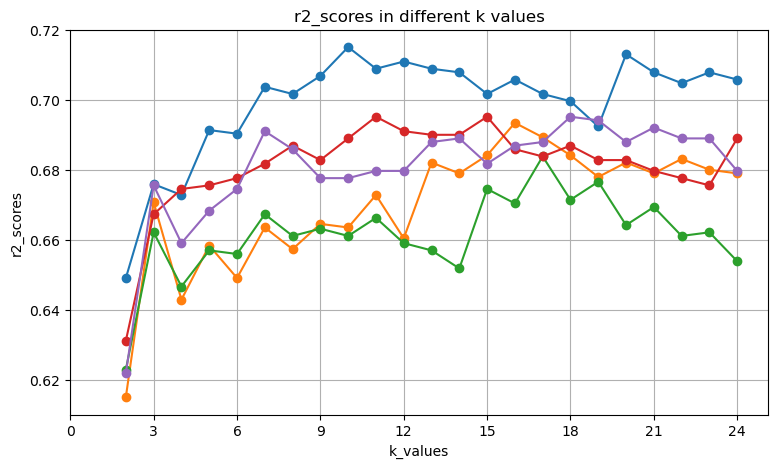

In [168]:
plt.figure(figsize=(9,5))
plt.plot(range(2,25),r2_scores,marker="o")
plt.ylabel("r2_scores")
plt.xlabel("k_values")
plt.title("r2_scores in different k values")
plt.xticks(range(0,25,3))
plt.grid()
plt.show()

In [169]:
k= 17
kn_model = KNeighborsClassifier(k).fit(X1_train, y1_train)
y_pred5_kn = kn_model.predict(X1_test)

In [170]:
kn_actrain = kn_model.score(X1_train, y1_train)
kn_actest = kn_model.score(X1_test, y1_test)

print("kn_train_acc_score", kn_actrain)
train_accrcy_score.append(kn_actrain)
print("kn_test_acc_score", kn_actest)
test_accrcy_score.append(kn_actest)

kn_train_acc_score 0.7176158158748893
kn_test_acc_score 0.686166551961459


In [171]:
f1_test = f1_score(y1_test, y_pred5_kn,average='macro')
test_f1_score.append(f1_test)

print("f1_test_score", f1_test)

f1_test_score 0.6761229214512431


In [172]:
kn_precision = precision_score(y1_test,y_pred5_kn, average='macro')
precision.append(kn_precision)
print("Model precision_score :",kn_precision)

Model precision_score : 0.6728762585372579


In [173]:
kn_recall=recall_score(y1_test,y_pred5_kn,average='macro')
recall.append(kn_recall)
print("Model recall_score :",kn_recall)

Model recall_score : 0.688797573820167


In [174]:
print(confusion_matrix(y1_test,y_pred5_kn))

[[231 178  70]
 [150 306  46]
 [ 12   0 460]]


In [175]:
print(classification_report(y1_test,y_pred5_kn))

              precision    recall  f1-score   support

           0       0.59      0.48      0.53       479
           1       0.63      0.61      0.62       502
           2       0.80      0.97      0.88       472

    accuracy                           0.69      1453
   macro avg       0.67      0.69      0.68      1453
weighted avg       0.67      0.69      0.67      1453



### Stacking

In [176]:
level1=[]
level1.append(("lr",lr_bal_model))
level1.append(("svr",SVC()))
level1.append(("dt",dt_bal_model))
level1.append(("rnd",rfbal_model))
level1.append(("ada", bal_ada_model))
level2=LogisticRegression() 
stack_model_bal=StackingClassifier(estimators=level1,final_estimator=level2,cv=kf)

In [177]:
level1

[('lr', LogisticRegression()),
 ('svr', SVC()),
 ('dt',
  DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=10)),
 ('rnd',
  RandomForestClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=10,
                         n_estimators=20)),
 ('ada', AdaBoostClassifier(learning_rate=0.05, n_estimators=10))]

In [178]:
st_model_bal =stack_model_bal.fit(X1_train, y1_train)
y_pred_stbal = st_model_bal.predict(X1_test)

In [179]:
stbal_actrain = st_model_bal.score(X1_train, y1_train)
stbal_actest = st_model_bal.score(X1_test, y1_test)

print("st_train_acc_score", stbal_actrain)
train_accrcy_score.append(stbal_actrain)
print("st_test_acc_score", stbal_actest)
test_accrcy_score.append(stbal_actest)

st_train_acc_score 0.8093832989082325
st_test_acc_score 0.7976600137646249


In [180]:
f1_test_stbal = f1_score(y1_test, y_pred_stbal,average='macro')
test_f1_score.append(f1_test_stbal)

print("f1_test_score", f1_test_stbal)

f1_test_score 0.7967479808625623


In [181]:
st_precision = precision_score(y1_test,y_pred_stbal,average='macro')
precision.append(st_precision)
print("Model precision_score :",st_precision)

Model precision_score : 0.7946658617692788


In [182]:
st_recall=recall_score(y1_test,y_pred_stbal, average='macro')
recall.append(st_recall)
print("Model recall_score :",st_recall)

Model recall_score : 0.8003171725069104


In [183]:
print(confusion_matrix(y1_test,y_pred_stbal))

[[339 118  22]
 [141 348  13]
 [  0   0 472]]


In [184]:
print(classification_report(y1_test,y_pred_stbal))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       479
           1       0.75      0.69      0.72       502
           2       0.93      1.00      0.96       472

    accuracy                           0.80      1453
   macro avg       0.79      0.80      0.80      1453
weighted avg       0.79      0.80      0.79      1453



### Summary:

In [185]:
model_list=["Logistic Regression","Gaussian Model","Decision Tree classifier","Random Forest classifier","Ada-boost classifier","KNN classifier","Stacked classifier"]
metric_list=["Models","Accuracy(train)","Accuracy(test)","Precision","Recall","F1 score"]

In [186]:
test_f1_score

[0.6859986085771022,
 0.5550546500235396,
 0.7458844535192188,
 0.7616332356697469,
 0.5254928774928774,
 0.6761229214512431,
 0.7967479808625623]

In [187]:
test_accrcy_score

[0.6930488644184446,
 0.596696490020647,
 0.7508602890571232,
 0.76668960770819,
 0.6304198210598762,
 0.686166551961459,
 0.7976600137646249]

In [188]:
final_results=pd.DataFrame()

In [189]:
for i in range(0,len(model_list)):
    ab=[[model_list[i],train_accrcy_score[i],test_accrcy_score[i],precision[i],recall[i],test_f1_score[i]]]
    new=pd.DataFrame(ab)
    final_results=pd.concat([final_results,new],axis=0)
final_results.columns=metric_list
final_results=final_results.reset_index(drop=True)  
final_results

,Models,Accuracy(train),Accuracy(test),Precision,Recall,F1 score
0,Logistic Regression,0.673060,0.693049,0.691132,0.697194,0.685999
1,Gaussian Model,0.583063,0.596696,0.632264,0.604636,0.555055
2,Decision Tree classifier,0.737386,0.750860,0.743051,0.753251,0.745884
3,Random Forest classifier,0.763942,0.766690,0.759656,0.769034,0.761633
4,Ada-boost classifier,0.642372,0.630420,0.457980,0.642310,0.525493
5,KNN classifier,0.717616,0.686167,0.672876,0.688798,0.676123
6,Stacked classifier,0.809383,0.797660,0.794666,0.800317,0.796748


In [190]:
rvse_list = list(final_results['Models'])
rvse_list

['Logistic Regression',
 'Gaussian Model',
 'Decision Tree classifier',
 'Random Forest classifier',
 'Ada-boost classifier',
 'KNN classifier',
 'Stacked classifier']

In [191]:
rvse_list.reverse()

In [192]:
rvse_list

['Stacked classifier',
 'KNN classifier',
 'Ada-boost classifier',
 'Random Forest classifier',
 'Decision Tree classifier',
 'Gaussian Model',
 'Logistic Regression']

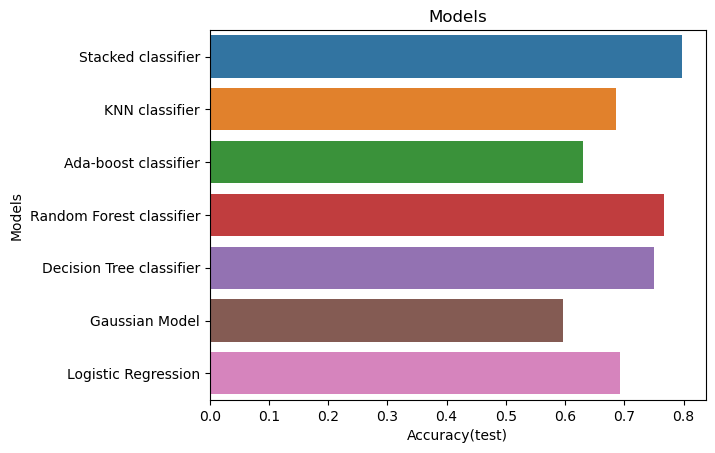

In [193]:
models = final_results['Models']
test_score = final_results['Accuracy(test)']
# ab = round(test_score.reverse(),4)

sns.barplot(test_score,models ,orient='h',order=rvse_list)
# plt.xlabel('Scores')
# for i, v in enumerate(test_score):
#     plt.text(v, i, str(v), ha='left', va='center')
plt.title('Models')
plt.show()

# 'Stacked classifier' tops the rating classification with test score of 79%, closely followed by 'Random Forest classifier' 